In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import time
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [3]:

def getArrayAnos(value):
    years =[]
    yearsRaw =[]
    for x in value:
        if(x[2]!=''):
            x[2]=x[2].replace('s', '')
            auxi = x[2].split(" yr")
            month = '0'
            if(auxi[0].find(" mo")):
                month=auxi[0]
            if(len(auxi)>1):
                if(auxi[1].find(" mo")):
                    month=auxi[1]
            month = month[:month.find(" mo")]
            if(month==''):
                month = '0'
            year = '0'
            if(auxi[0].find(" mo")<0):
                year = auxi[0]
            duracaoAnos=(int(year)+int(month)/12)
            yearsRaw.append(x[2])
            years.append(duracaoAnos)
    return years

In [5]:

sources = ['./profiles-data-vivo.parquet', './profiles-data-accenture.parquet', 'profiles-data-magazine.parquet', 'profiles-data-itau.parquet']
formatedYears = []
count2 = 0
until2 = len(sources)
error=0
for source in sources:
    data = pq.read_table(source=source).to_pandas()
    print(len(data['data']))
    profiles = data['data']
    count = 0
    until = len(profiles)
    count2+=1
    for profile in profiles:
        try:
            years = getArrayAnos(profile)
            formatedYears.append(years)
            count+=1
            print(count+1 ,' de ',until,'  ',count2,'/',until2, 'error=', error)
        except:
            error+=1
            print(count+1 ,' de ',until,'  ',count2,'/',until2, 'error=', error,"An exception occurred")


257
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665]]
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665], [1.4166666666666667, 1.1666666666666667, 1.0, 1.5, 1.5]]
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665], [1.4166666666666667, 1.1666666666666667, 1.0, 1.5, 1.5], [1.6666666666666665, 16.333333333333332, 5.25, 1.1666666666666667, 1.0833333333333333, 2.0833333333333335, 4.583333333333333, 1.3333333333333333]]
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665], [1.4166666666666667, 1.1666666666666667, 1.0, 1.5, 1.5], [1.6666666666666665, 16.333333333333332, 5.25, 1.1666666666666667, 1.0833333333333333, 2.0833333333333335, 4.583333333333333, 1.3333333333333333], [1.75, 1.25, 2.9166666666666665, 1.25]]
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665], [1.4166666666666667, 1.1666666666666667, 1.0, 1.5, 1.5], [1.6666666666666665, 16.33333

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [61]:
print(len(formatedYears))
profiles_schema = pa.schema([
('data', pa.large_list(pa.int8())),
])
paProfiles = pa.array(formatedYears)
batch = pa.RecordBatch.from_arrays(
    [paProfiles],
    names=profiles_schema.names
)

table = pa.Table.from_batches([batch])
print(len(paProfiles))
pq.write_table(table, './formatedYears.parquet')
print(formatedYears)

659
659
[[1.0833333333333333, 1.5833333333333335, 1.25, 0.25, 0.25, 1.6666666666666665], [1.4166666666666667, 1.1666666666666667, 1.0, 1.5, 1.5], [1.6666666666666665, 16.333333333333332, 5.25, 1.1666666666666667, 1.0833333333333333, 2.0833333333333335, 4.583333333333333, 1.3333333333333333], [1.75, 1.25, 2.9166666666666665, 1.25], [0.6666666666666666, 2.5], [11.833333333333334, 2.0833333333333335, 10.5], [0.9166666666666666], [1.5833333333333335, 0.9166666666666666, 0.8333333333333334, 2.0833333333333335, 2.0833333333333335], [2.3333333333333335, 1.0, 0.5, 1.0, 0.5, 0.4166666666666667, 1.0, 4.083333333333333], [1.1666666666666667, 1.8333333333333335, 1.25, 2.1666666666666665, 6.666666666666667], [2.9166666666666665, 0.6666666666666666, 1.3333333333333333, 2.6666666666666665, 1.4166666666666667], [2.8333333333333335, 0.5833333333333334, 1.0833333333333333, 0.9166666666666666, 2.1666666666666665, 0.6666666666666666, 2.0], [2.3333333333333335], [6.666666666666667, 1.1666666666666667, 1.75

In [103]:
data = pq.read_table(source='./formatedYears.parquet').to_pandas()
profiles = data['data']
print(profiles)

mini=100

maxi=0
result=[]
for x in profiles:
    if(len(x)<mini):
        mini=len(x)
    if(len(x)>maxi):
        maxi=len(x)
    array_1 = np.array(x)
    array_2 = np.array([0]*(20-len(x)))
    array_3 = np.append(array_1, array_2)
    #if(len(result)<10):
    result.append(array_3)
    
    
print(mini)
print(maxi)

0      [1.0833333333333333, 1.5833333333333335, 1.25,...
1      [1.4166666666666667, 1.1666666666666667, 1.0, ...
2      [1.6666666666666665, 16.333333333333332, 5.25,...
3                 [1.75, 1.25, 2.9166666666666665, 1.25]
4                              [0.6666666666666666, 2.5]
                             ...                        
654    [1.75, 0.5, 0.5833333333333334, 4.083333333333...
655    [1.75, 0.3333333333333333, 0.5833333333333334,...
656    [1.8333333333333335, 1.0833333333333333, 0.25,...
657    [5.083333333333333, 0.5833333333333334, 2.0833...
658    [0.5833333333333334, 1.75, 7.833333333333333, ...
Name: data, Length: 659, dtype: object
1
20


659


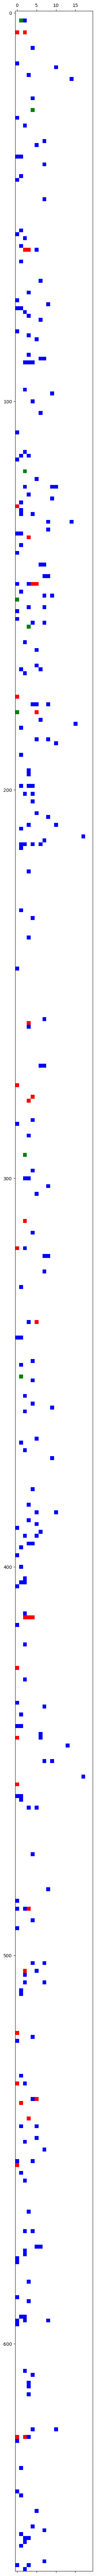

In [128]:

print(len(result))
##print(result)
##df = pd.DataFrame(result)
plt.figure(figsize=(200,100))
cmap = ListedColormap(['w', 'b', 'r','g'])
plt.matshow(result, fignum=1,cmap=cmap)
plt.show()